## Introduction ##

Neutrinos are subatomic particles that are electrically neutral and extremely elusive, hence rarely interacting with matter. To understand these elementary particles better there is the study of neutrino oscillations, a quantum mechanical phenomenon, which has become a vital focus of investigation within the field of particle physics. As they only interact through weak interaction or gravity, it makes them very difficult to detect.

The concept of neutrino oscillation arises from the intriguing behaviour of neutrinos transforming between different flavour eigenstates($\nu_{\mu}$, $\nu_{\tau}$, $\nu_{e}$) as they propagate through space.

My virtual laboratory will set the stage for a simulated experiment, where my objective is aimed at decoding the nuances of neutrino oscillations. In this project, the central quest involves the meticulous measurement of key oscillation parameters. I will delve into the intricacies of neutrino oscillations through a simulated experiment.

### Objectives ###

1. **Determine the Shape of the Neutrino Beam**: Investigate the survival probability of muon neutrinos ($\nu_{\mu}$) as a function of distance, laying the foundation for understanding neutrino oscillation probabilities. Utilize the two-flavour neutrino oscillation probability formula to simulate the survival probability.

2. **Predict the Far Detector Spectrum**: Based on the near detector measurements, predict the neutrino spectrum at the far detector for various neutrino oscillation parameters.

3. **Fit the Far Detector Spectrum**: Employ the Gaussian function to the fit the near detector neutrino spectrum, extracting parameters such as the mean, standard deviation and normalization. Extend this fitting approach to the far detector spectrum, seeking the best-fit oscillation parameters through the optimization of the Gaussian function with oscillation probability


## Methods ##

>#### Prerequisite ####
> As a prerequisite, I am going to mention that throughout the project I have used a wide range of tools from the *numpy* and *matplotlib* libraries Everytime in the code lines you see `np.` it is referring to the numpy library and `plt.` is referring to the matplotlib.pyplot library

>#### Assumptions ####
>
>To streamline my computations, I made certain assumptions, realizing their simplifying nature compared to real-world scenarios, as you'll see in Part 2.
>
>My assumptions include the equivalence of near and far detector spectra in absence of oscillations, accounting for Poisson fluctuations.
>
>Additionally, I also assumed an ideal scenario where the measured neutrino energy is a faithful representation of the true neutrino energy, free from bias or resolution issues. The experimental baseline is fixed at 1000km.

<br>

### Part 1: Determine the Shape of the Neutrino Beam ###

In this section, to gain insight into neutrino oscillation probabilities, I simulated the survival probability of muon neutrinos ($\nu_{\mu}$) as they travel a range of distances, in my case I kept this 0 to 1000km, like mentioned earlier.

The simulation employs the oscillation probability formula:

$\Large P(\nu_{\mu}\rightarrow\nu_{\mu}) = 1 - \sin^{2}(2\theta)\sin^{2}(1.27\Delta m^{2}[eV^{2}]\frac{L [km]}{E[GeV]})$

the parameters in this equation are:
* L - length, the distance the neutrinos have travelled in km
* E - the energy of the neutrinos in GeV
* $\Delta m^{2} = m_{2}^{2} - m_{1}^{2}$ - the mass squared difference between the two neutrino mass eigenstates
* $\theta$ - a quantum mechanical mixing angle that specifies the mixing between the neutrino flavour and mass eigenstates

I plotted this survival probability as a function of distance for a 2GeV neutrino for distances (L) between 0 and 1000km, if $\Delta m^{2} = 2.2 \times 10^{-3} eV^{2}$ and $\sin^{2}(2\theta) = 0.98$:

```
def P_numu_numu(L,E,deltam2,sin22theta):
    return 1 - ( sin22theta * np.sin(1.27 * deltam2 * L / E ) **2 )

E = 2 #GeV
deltam2 = 2.2e-3 #eV^2
sin22theta = 0.98
Ls = np.linspace(0, 1000, 1000) # range distances between 0 and 1000 km

Ps = P_numu_numu(Ls,E,deltam2,sin22theta)
plt.plot(Ls,Ps)
```
<br>

1\. <u>**Plot Histogram of Neutrino Events**</u>:To gain insights into the behavior of neutrino events, I meticulously plotted a histogram based on the observed number of neutrino events in each energy bin within the near detector. This visual representation, derived from authentic data, serves as a foundational exploration of the neutrino beam's characteristics.

The resulting histogram provides a visual representation of the distribution of neutrino events across different energy states. This initial exploration sets the stage for further analysis and model fitting, offering a glimpse into the inherent characteristics of the near detector's data. The histogram's shape and features become crucial in understanding the nuances of the neutrino beam.

```
bin_edges = np.array([...])  # Energy bin edges
bin_centers = np.array([...])  # Energy bin centers
counts = np.array([...])  # Observed number of neutrino events in each bin

plt.hist(bin_edges[:-1], bin_edges, weights=counts, histtype='step')
plt.title('Observed Number of Neutrino Events per Energy Bin in Near Detector')
plt.xlabel('Energy State')
plt.ylabel('Observed number of Neutrinos')
plt.grid(True)
plt.show()

```

This histogram provides an initial glimpse of the neutrino beam's characteristics, helping us understand its approximate shape.

2\. <u>**Gaussian Parameters**</u>: To characterize the neutrino beam, I fit a Gaussian function to the observed near detector spectrum. The Gaussian function, representing the approximate shape of the beam is epxressed as:

$\Large f(E) = p_{0}\exp(-0.5(E - p_{1})^{2}/p_{2}^{2})$

Hence, getting:

```
def gaus(x,p0,p1,p2):
    return p0 * np.exp(-0.5 * ( x - p1 )**2 / p2**2)
```

And to find the values for normalization ($p0$), mean ($p1$) and standard deviation ($p2$) I used the scipy.optimize.curve_fit:

```
from scipy.optimize import curve_fit

params, cov = curve_fit(gaus, bin_centers, counts, p0=start_params)
print(params, cov)

params = [106, 2, 0.4]
```

<br>

3\. <u>**Checking Fitting Accuracy**</u>: To ensure the fitting process is accurate, I performed a check by fitting the Gaussian function to itself with a slightly different parameters.
The plot allows for a direct comparison between the initial parameters, the Gaussian fit to the unfluctuated data, and the final fitted parameters. Any discrepancies or inconsistencies are readily apparent, providing valuable insights into the reliability and accuracy of the fitting process. This meticulous validation step enhances the credibility of the subsequent analysis in the project.

```
delta = 0.1       # the fluctuation value
my_unfluc_counts = gaus(bin_centers, start_params[0] + delta, start_params[1] + delta, start_params[2] + delta)

# Fit the unfluctuated counts and plot
params_d, cov_d = curve_fit(gaus, bin_centers, my_unfluc_counts, p0=start_params)

```
This verification is an important step as it helps me evaluate the reliability and robustness of the Gaussian fitting procedure.

<br>

4\. <u>**$\chi^{2}$ Test for Goodness of Fit**</u>: To quantitatively assess the goodness of the Gaussian fit, I used a $\chi^{2}$ test. The formula for $\chi^{2}$, adapted to the Poisson distribution ($\sigma$ = $\sqrt{\lambda}$) is as given:

$\Large \chi^{2} = \sum_i \frac{(observed_{i} - expected_{i})^2}{(expected_{i} + \epsilon)} $

This fitting process allows for the determination of optimal parameter values, subsequently providing crucial insights into the central tendencies and spreads of the neutrino beam, essential for further analyses. The resulting parameters, namely $p0$, $p1$ and $p2$ form the foundation for characterizing the Gaussian shape of the neutrino beam.

I then translated the formula above into code which looks like this:

```
import sys
epsilon = sys.float_info.epsilon # used the lowest possible value in Python

# Defining the function to get $\chi^{2}$
def chi2_test(observed, expected):
    return sum((observed - expected) ** 2 / (expected + epsilon))

# Calculate chi2
preds = gaus(bin_centers, params[0], params[1], params[2])
chi2 = chi2_test(counts, preds)

# Calculate ndof
ndof = len(bin_centers) - 3  # 3 parameters in the Gaussian fit

# Print reduced chi2
print(chi2 / ndof)
```

where "observed" values represent the actual data and "expected" values are predicted by the Gaussian fit. The $\epsilon$ is set to a small number to avoid division by zero.


<br>

### Part 2: Predict the far detector spectrum for different neutrino oscillation parameters ###

#### (a) Prediction and Comparison ####

In this part of the experiment, I aim to predict the far detector neutrino spectrum under different oscillation parameters.

To begin with, I have leveraged the Gaussian fit obtained from the near detector measurement, to predict the far detector neutrino spectrum without oscillations.

The following steps outline my approach:

1\. <u>**Gaussian Parameters**</u>: I utilized the parameters obtained from the Gaussian fit in the near detector, including the normalization ($p0$), mean ($p1$), and standard deviation ($p2$)

```
# Parameters for the Gaussian fit
params = [106, 2, 0.4]
```

<br>

2\. <u>**Predict Unoscillated Spectrum**</u>: I used the Gaussian function to predict the unoscillated far detector spectrum
This predictive model forms the basis for evaluating the impact of oscillations on the far detector spectrum, enabling a systematic comparison between the unaltered and oscillated scenarios. The Poisson fluctuations account for the inherent statistical nature of neutrino interactions.

```
#Predict unoscillated far detector spectrum

FD_unosc = gaus(bin_centers, params[0], params[1], params[2])
```
<br>

3\. <u>**Poisson Fluctuation**</u>: Introduced Poisson fluctuations to simulate the statistical nature of particle detections.
To realistically model the stochastic nature of particle interactions and measurements, Poisson fluctuations are introduced to the predicted unoscillated far detector spectrum. This step ensures that the simulated data reflects the inherent statistical variability expected in actual experimental observations.
The Poisson fluctuation process involves generating random samples from a Poisson distribution based on the expected values of the unoscillated far detector spectrum, which mimics the variability in the number of observed neutrino events that would be encountered in a real-world experimental scenario.


```
#Poisson fluctuation for unoscillated far detector spectrum

FD_unosc_fluct = np.random.poisson(FD_unosc)
```
<br>

4\. <u>**Comparison Plot**</u>: Visualized the near detector spectrum alongside the unoscillated far detector spectrum
To gain insights into the effects of neutrino oscillation, a crucial step involved creating a visual representation. I generated a plot that shows the near detector spectrum, obtained from actual measurements, with the unoscillated far detector spectrum. This comparison allows for a direct observation of any discrepancies between the two, offering a preliminary understanding of the impact of oscillations on neutrino behavior. The plot was constructed using the matplotlib library in Python.

```
#Plotting

plt.hist(bin_edges[:-1], bin_edges, weights=counts, histtype='step', label="Near Detector")

plt.hist(bin_edges[:-1], bin_edges, weights=FD_unosc_fluct, histtype='step', label="Far Detector Unoscillated")

plt.legend()

plt.title('Comparison of Near and Unoscillated Far Detector Neutrino Spectra')

plt.xlabel('Energy State')

plt.ylabel('Observed number of Neutrinos')

plt.grid(True)

plt.show()
```

In this plot, the "Near Detector" represents the observed neutrino spectrum at a short baseline, while "Far Detector Unoscillated" simulates the predicted spectrum at a longer baseline without neutrino oscillations. Poisson fluctuations are introduced to account for the statistical nature of particle detections.

<br>

#### (b) Prediction and Visualization ####

Moving to the scenario with neutrino oscillations, we predict the far detector spectrum using specific oscillation parameters: $\sin^{2}2\theta = 1.0$ and $\Delta m^{2} = 2.4*10^{-3} eV^{2}$.

The step-by-step process is as follows:

1\. <u>**Oscillation Function**</u>: I defined the function representing neutrino oscillation probability.
The oscillation function takes as input the neutrino energy (E), the mixing angle parameter ($\sin^{2}2\theta$), and the mass squared difference parameter ($\Delta m^{2}$). These parameters play pivotal roles in determining the probabilities associated with neutrino oscillations.

The function involves a sinusoidal term, reflecting the wave-like behavior of neutrino oscillations. The mixing angle and mass squared difference govern the amplitude and frequency of this oscillatory behavior.

```
# Function for neutrino oscillation prediction
def osc(E, sin2_2theta, delta_m2):
    L = 1000.0
    return 1 - sin2_2theta * np.sin(1.27 * delta_m2 * L / E)**2
```

<br>

2\. <u>**Oscillation Parameters**</u>: Set the oscillation parameters.
Subsequently, predictions are made for the far detector spectrum under the influence of neutrino oscillations. For this particular instance, the parameters $\sin^{2}2\theta = 1.0$ and $\Delta m^{2} = 2.4 \times 10^{-3} , \text{eV}^{2}$ are considered.
```
# Oscillation parameters
sin2_2theta = 1
delta_m2 = 2.4e-3
```

<br>

3\. <u>**Predict Oscillated Spectrum**</u>:  I utilized the defined oscillation function to predit the oscillated far detector spectrum.
The oscillation function is utilized to predict the far detector spectrum under the specified oscillation parameters. Similar to the unoscillated scenario, Poisson fluctuations are introduced to simulate the inherent statistical variations.

The choice of parameters $\sin^{2}2\theta = 1.0$ and $\Delta m^{2} = 2.4 \times 10^{-3} , \text{eV}^{2}$ represents a scenario with maximal mixing, providing a contrasting prediction to the unoscillated spectrum.

```
# Predict oscillated far detector spectrum
FD_osc = osc(bin_centers, sin2_2theta, delta_m2)
```

<br>

4\. <u>**Poisson Fluctuation**</u>: I applied the Poisson fluctuations to the predicted oscillated spectrum.
The rationale behind Poisson fluctuations lies in the nature of particle detection, where the probability of detecting a certain number of particles follows a Poisson distribution. By incorporating this element into the simulated data, the analysis becomes more robust, accounting for the intrinsic uncertainties associated with particle detection and measurement processes.
```
# Poisson fluctuation for oscillated far detector spectrum
FD_osc_fluct = np.random.poisson(FD_osc * gaus(bin_centers, params[0], params[1], params[2]))
```

<br>

5\. <u>**Comparison Plot**</u>: I then visualized the near detector spectrum alongside the oscillated far detector spectrum.
The predictions for the unoscillated and oscillated far detector spectra are visualized and compared in a single plot, allowing for a qualitative assessment of the impact of neutrino oscillations.

The histogram plot showcases the near detector spectrum alongside the predictions for both unoscillated and oscillated far detector spectra. This visual representation aids in discerning the impact of neutrino oscillations on the expected neutrino counts in the far detector, providing valuable insights into the behavior of neutrinos over long distances.

```
plt.hist(bin_edges[:-1], bin_edges, weights=counts, histtype='step', label="Near Detector")
plt.hist(bin_edges[:-1], bin_edges, weights=FD_osc_fluct, histtype='step', label="Far Detector Oscillated")
plt.legend()
plt.title('Comparison of Near Detector and Oscillated Far Detector Neutrino Spectra')
plt.xlabel('Energy State')
plt.ylabel('Observed number of Neutrinos')
plt.grid(True)
plt.show()
```

This plot provides a visual comparison between the observed near detector spectrum and the predicted far detector spectrum under the influence of neutrino oscillations.

The "Far Detector Oscillated" curve demostrates the expected far detector considering oscillations. Poisson fluctuations are introduced to represent the statistical variations in particle detection.

<br>

### Part 3: Fit the far detector neutrino spectrum to find the best fit oscillation parameters ###

This is the last part of the experiment, here I aim to determine the best-fit values for the oscillation parameters ($\sin^{2}2\theta$ and $\Delta m^{2}$) by fitting the observed far detector counts o a theoretical model.

The theoretical model includes a Gaussian function multiplied by the neutrino oscillation probability.

I started by defining the function to be fit, $f(E, \sin^{2}2\theta, \Delta m^{2})$ representing the product of the Gaussian function and the oscillation probability. The function takes the neutrino energy ($E$), the oscillation parameters ($\sin^{2}2\theta$ and $\Delta m^{2}$) as well as the normalization (*norm*), mean (*mean*), and standard deviation (*std*) of the Gaussian as arguments.

```
def f(E, sin2_2theta, delta_m2):
    return (1 - sin2_2theta * np.sin(1.27 * delta_m2 * 1000 / E)**2 ) * np.exp(-0.5 * (E - mean)**2 / std**2) * norm
```

I set initial parameter values and use `scipy.optimize.curve_fit` to obtain the best-fit parameters and the covariance matrix. The $\chi^{2}$ test is then applied to evaluate the goodness of fit. The test assesses the agreement between the observed far detector counts and the counts predicted by the model.

```
# initial_params = [sin2_2theta, delta_m2]
initial_params = [1, 2.4e-3]

parameters, covariance = curve_fit(f, bin_centers, FD_counts, p0=initial_params)

FD_fit = f(bin_centers, *parameters)

chi_2 = chi2_test(FD_counts, FD_fit)
ndof_2 = len(bin_centers) - len(parameters)
chi_2_ndof = chi_2 / ndof_2
```

To assess the reliability of the fit, I then performed a $\chi^{2}$ test and calculated the reduced $\chi^{2}$. The obtained best-fit parameters are then used to generate a fluctuated prediction for the far detector spectrum.

```
FD_fit_fluct = np.random.poisson(FD_fit)
```

The Poisson fluctuation introduces a range of variations into the predicted far detector spectrum, reflecting the inherent uncertainties associated with experimental measurements. This step ensures a more realistic simulation, considering the probabilistic nature of particle interactions and detections in the context of neutrino experiments.

<br>


## Results ##

The primary goal of this project was to investigate neutrino oscillation parameters in a simulated experiment.

The investigation involved three main steps:

* determining the neutrino beam shape
* predicting the far detector spectrum under different oscillation parameters
* fitting the far detector data to find the best-fit oscillation parameters.


###### In the initial step, I explored the muon neutrino oscillation survival probability as a function of distance. The theoretical survival probability was calculated using the given parameters ($\Delta m^{2} = 2.2 \times 10^{-3} eV^2$ and $\sin^{2}2\theta = 0.98$). ######

###### The survival probability graphically illustrated the oscillatory behaviour due to the sine function, emphasizing the dependency on distance travelled. This foundational understanding set the stage for subsequent analyses. ######

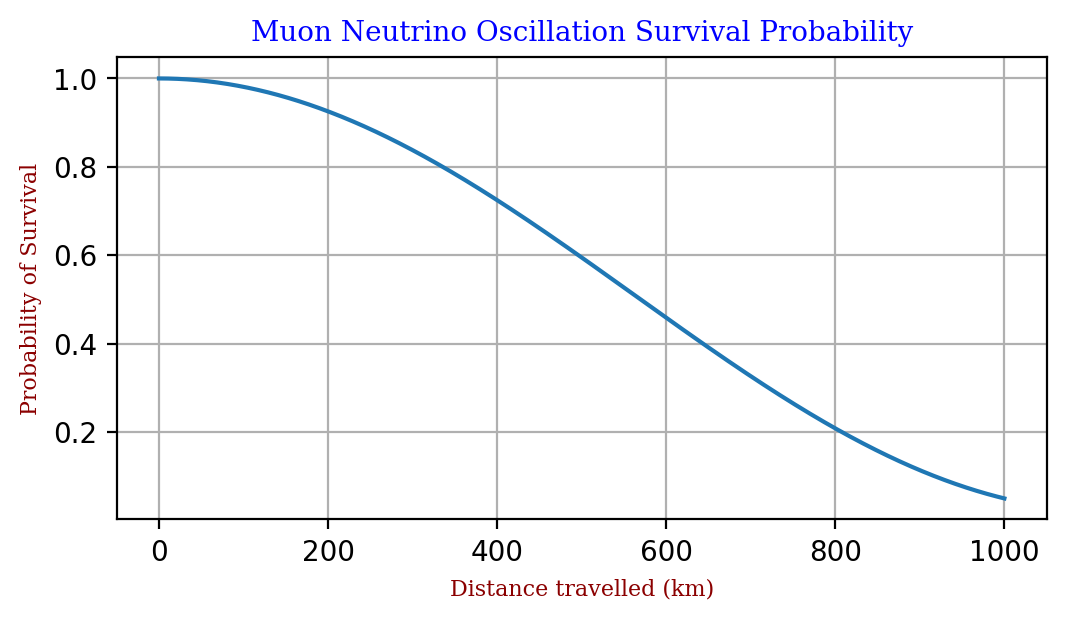

In [24]:
plt.figure(figsize=(6, 3))
Ps = P_numu_numu(Ls,E,deltam2,sin22theta)
plt.plot(Ls,Ps)
plt.title('Muon Neutrino Oscillation Survival Probability', fontdict = font3)
plt.xlabel('Distance travelled (km)', fontdict = font4)
plt.ylabel('Probability of Survival', fontdict = font4)
plt.grid(True)

###### *Later in the extension, I explored the correlation between survival probability and distance further, where I increased the distance $L$ from 1,000km to higher values such as 4,000km and 8,000km. Once again, highlighting the oscillatory nature of the survival probability.* ######

<br>

###### The near detector histogram below illustrates the number of counts observed at each energy eigenstate. ######

###### The histogram further complemented my comprehension, providing insights into the shape of the neautrino beam. Looking this shape has been a stepping stone into progressing with the experiment as here the data visually suggests that a Gaussian model would most suitable. ######


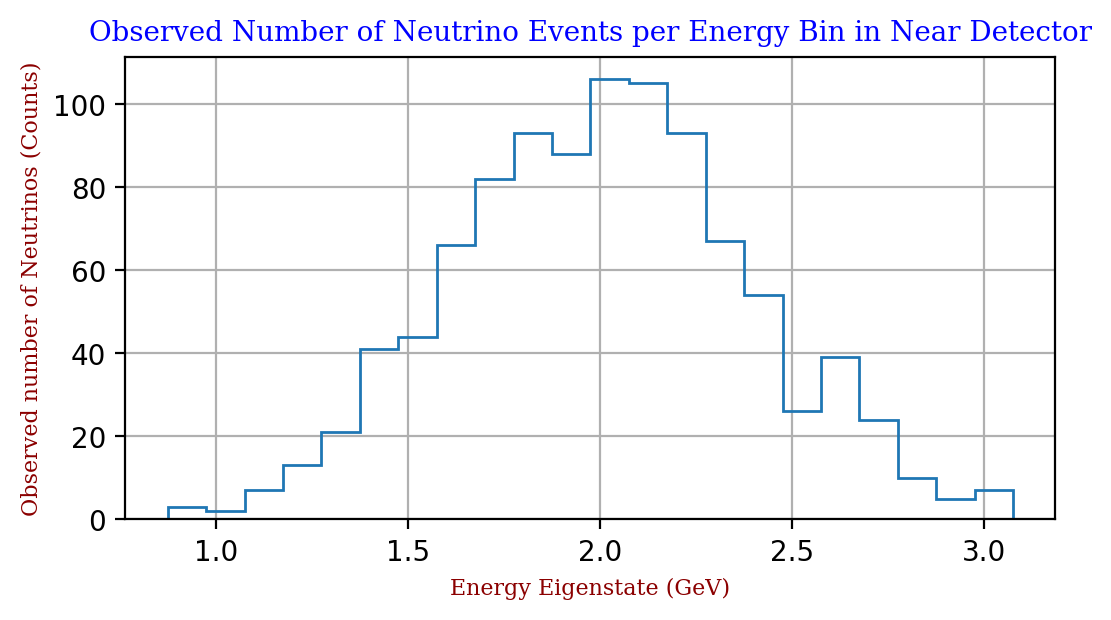

In [25]:
plt.figure(figsize=(6, 3))
plt.hist(bin_edges[:-1],bin_edges,weights=counts,histtype='step')
plt.title('Observed Number of Neutrino Events per Energy Bin in Near Detector', fontdict = font3)
plt.xlabel('Energy Eigenstate (GeV)', fontdict = font4)
plt.ylabel('Observed number of Neutrinos (Counts)', fontdict = font4)
plt.grid(True)

###### Applying a Gaussian fit to the histogram allows me to estimate the beam's mean, standard deviation and normalization. #######

###### Later, this fitting process was validated through a $\chi^{2}$ test, evaluating the agreement between the fitted model and the oberserved data. ######

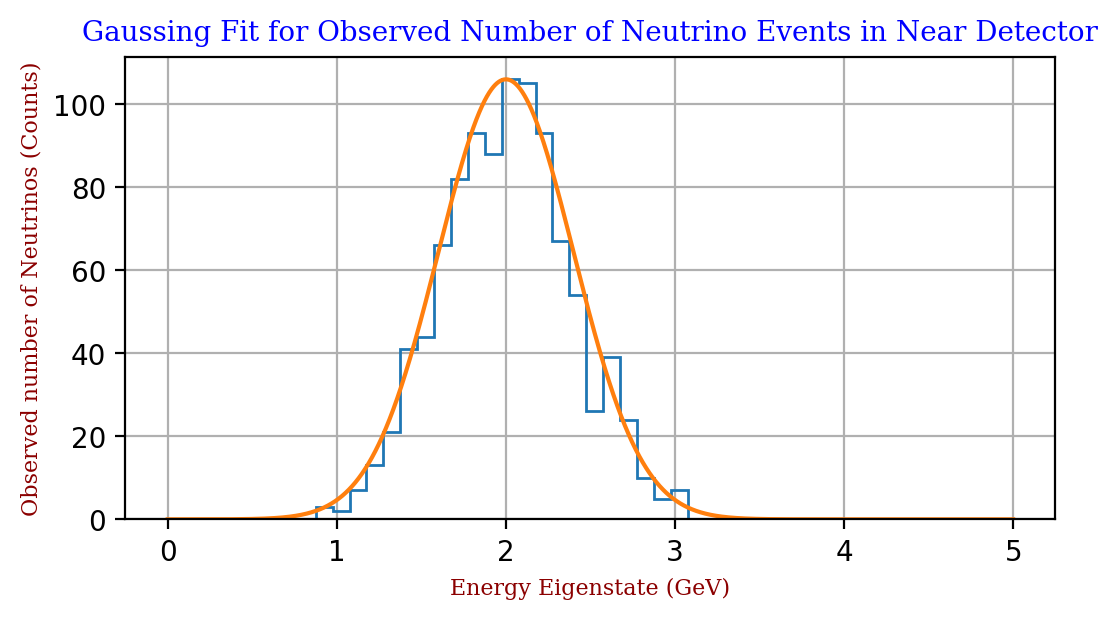

In [26]:
plt.figure(figsize=(6, 3))
plt.hist(bin_edges[:-1],bin_edges,weights=counts,histtype='step')
xs = np.arange(0.0,5.0,0.001)
plt.plot(xs,gaus(xs,start_params[0],start_params[1],start_params[2]))
plt.title('Gaussing Fit for Observed Number of Neutrino Events in Near Detector', fontdict = font3)
plt.xlabel('Energy Eigenstate (GeV)', fontdict = font4)
plt.ylabel('Observed number of Neutrinos (Counts)', fontdict = font4)
plt.grid(True)

###### Here I have compare how the starting parameters and the fitted parameters given by the curve_fit function compare. ######
###### It is clear that although the values I guessed were a solid and reliable approximation for the model, using the curve_fit function gave the most mathematically accurate model ######

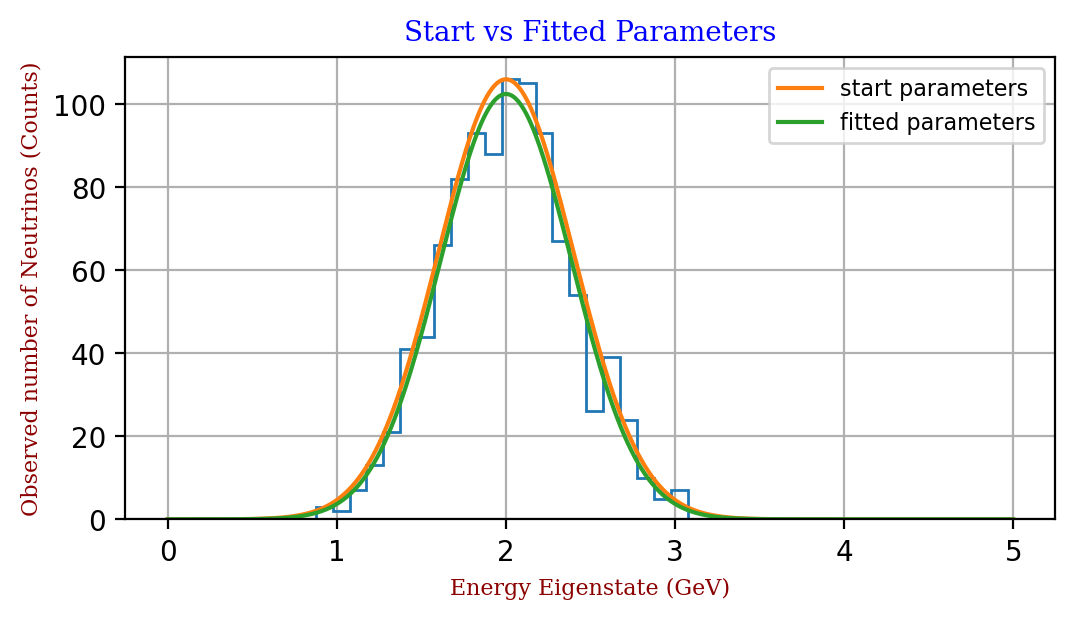

In [27]:
params = [102.47053059, 2.00041969, 0.38814624]
plt.figure(figsize=(6, 3))
plt.hist(bin_edges[:-1],bin_edges,weights=counts,histtype='step')
xs = np.arange(0.0,5.0,0.001)
plt.plot(xs,gaus(xs,start_params[0],start_params[1],start_params[2]),label="start parameters")
plt.plot(xs,gaus(xs,params[0],params[1],params[2]),label="fitted parameters")
plt.legend(fontsize=8)
plt.title('Start vs Fitted Parameters', fontdict = font3)
plt.xlabel('Energy Eigenstate (GeV)', fontdict = font4)
plt.ylabel('Observed number of Neutrinos (Counts)', fontdict = font4)
plt.grid(True)


###### As a crucial step in the analysis, a rigorous check of the fitting accuracy is conducted. This involves fitting the Gaussian function to itself with slightly different parameters, providing a valuable assessment of the fitting methodology's robustness. ######

###### By intentionally introducing small variations in the parameters, this check gauges how well the fitting algorithm adapts to fluctuations. This process aids in confirming the reliability of the fitting procedure and ensures that the algorithm is robust enough to handle variations in the input parameters. ######

###### The accuracy of the fitting is visually validated by plotting the histograms of the unfluctuated data, the initial Gaussian fit, and the final fitted parameters. This visual representation provides an intuitive understanding of how well the fitting algorithm aligns with the input data under slightly perturbed conditions. ######

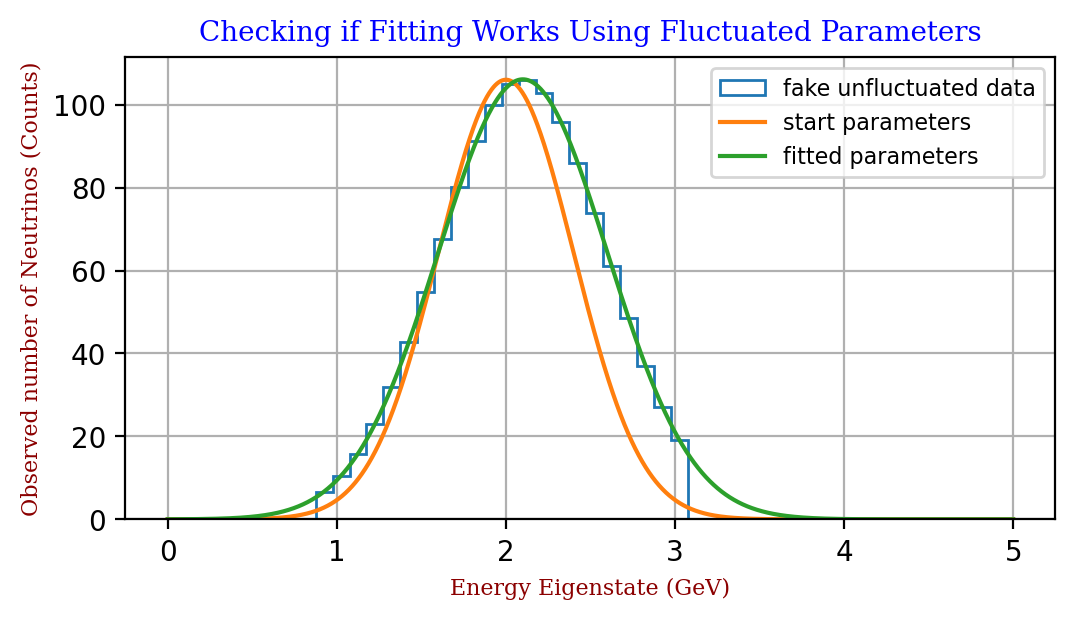

In [28]:
plt.figure(figsize=(6, 3))
plt.hist(bin_edges[:-1],bin_edges,weights=my_unfluc_counts,histtype='step',label="fake unfluctuated data")
xs = np.arange(0.0,5.0,0.001)
plt.plot(xs,gaus(xs,start_params[0],start_params[1],start_params[2]),label="start parameters")
plt.plot(xs,gaus(xs,params_d[0],params_d[1],params_d[2]),label="fitted parameters")
plt.legend(fontsize=8)
plt.title('Checking if Fitting Works Using Fluctuated Parameters', fontdict = font3)
plt.xlabel('Energy Eigenstate (GeV)', fontdict = font4)
plt.ylabel('Observed number of Neutrinos (Counts)', fontdict = font4)
plt.grid(True)

###### The second phase involved predicting the far detector under different oscillation parameters. ######

###### To establish a baseline comparison, the unoscillated far detector spectrum was predicted, assuming $\sin^{2}2\theta = 0$ and $\Delta m^{2} = 0$. This prediction serves as a reference point, representing the scenario where neutrinos do not undergo oscillations during their propagation from the near to the far detector. ######

###### The unoscillated prediction establishes a crucial baseline, allowing for a direct comparison with subsequent predictions under oscillation scenarios. It provides insights into the expected far detector spectrum in the absence of neutrino oscillations, emphasizing the impact of oscillation phenomena on the observed particle interactions. ######

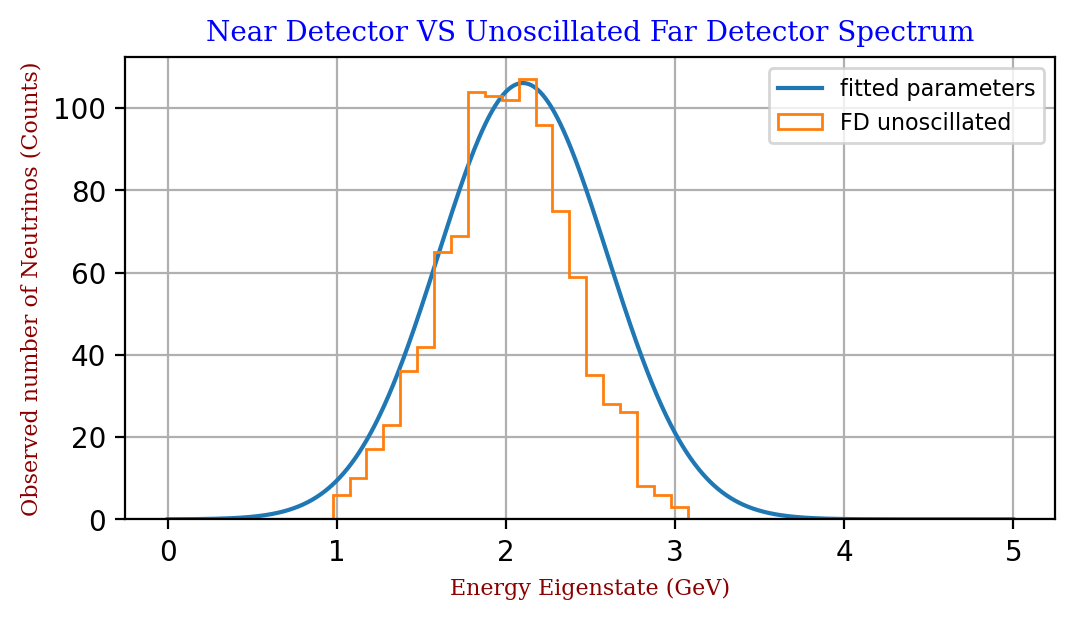

In [29]:
plt.figure(figsize=(6, 3))
plt.plot(xs,gaus(xs,params_d[0],params_d[1],params_d[2]),label="fitted parameters")
plt.hist(bin_edges[:-1],bin_edges,weights=FD_unosc_fluct,histtype='step',label="FD unoscillated")
plt.legend(fontsize=8)
plt.title('Near Detector VS Unoscillated Far Detector Spectrum', fontdict = font3)
plt.xlabel('Energy Eigenstate (GeV)', fontdict = font4)
plt.ylabel('Observed number of Neutrinos (Counts)', fontdict = font4)
plt.grid(True)
plt.show()

###### Subsequently, I explored the impact of oscillations by predicting the far detector spectrum with altered parameters ($\sin^{2}2\theta = 1.0$ and $\Delta m^{2} = 2.4 \times 10^{-3} eV^{2}$). ######

###### The visualizations allowed for a direct comparison with the unoscillated spectrum, revealing the effects of neutrino oscillations on the expected counts ######

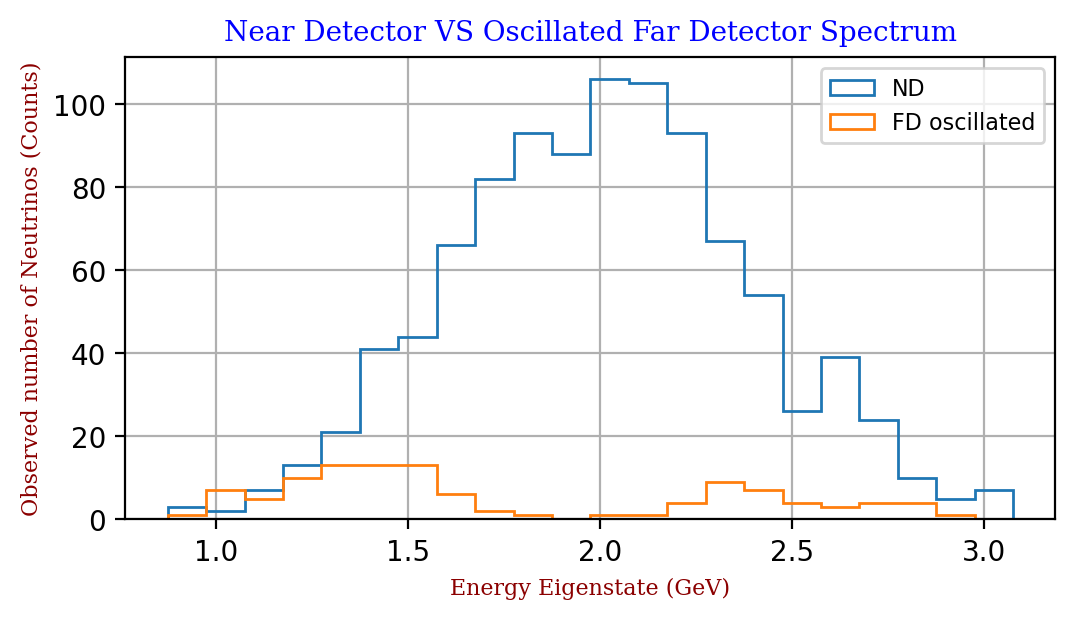

In [30]:
plt.figure(figsize=(6, 3))

plt.hist(bin_edges[:-1],bin_edges,weights=counts,histtype='step',label="ND")
plt.hist(bin_edges[:-1],bin_edges,weights=np.random.poisson(FD_osc*gaus(bin_centers, params[0], params[1], params[2])),histtype='step',label="FD oscillated")
plt.legend(fontsize=8)
plt.title('Near Detector VS Oscillated Far Detector Spectrum', fontdict = font3)
plt.xlabel('Energy Eigenstate (GeV)', fontdict = font4)
plt.ylabel('Observed number of Neutrinos (Counts)', fontdict = font4)
plt.grid(True)
plt.show()

<br>

## Part 3 ##

###### This final step aimed to find the best-fit oscillation parameters by fitting the observed far detector counts. The fitting process involved optimizing the parameters ($\sin^{2}2\theta$ and $\Delta m^{2}$) to maximize the agreement between the theoretical model and the actual observations. ######

###### This fitting function incorporates both the Gaussian shape characterizing the neutrino beam and the oscillation probability, providing a comprehensive representation of the expected counts in the far detector. The optimization process seeks to align the predicted spectrum with the actual observations, adjusting the oscillation parameters to achieve the best possible fit. ######

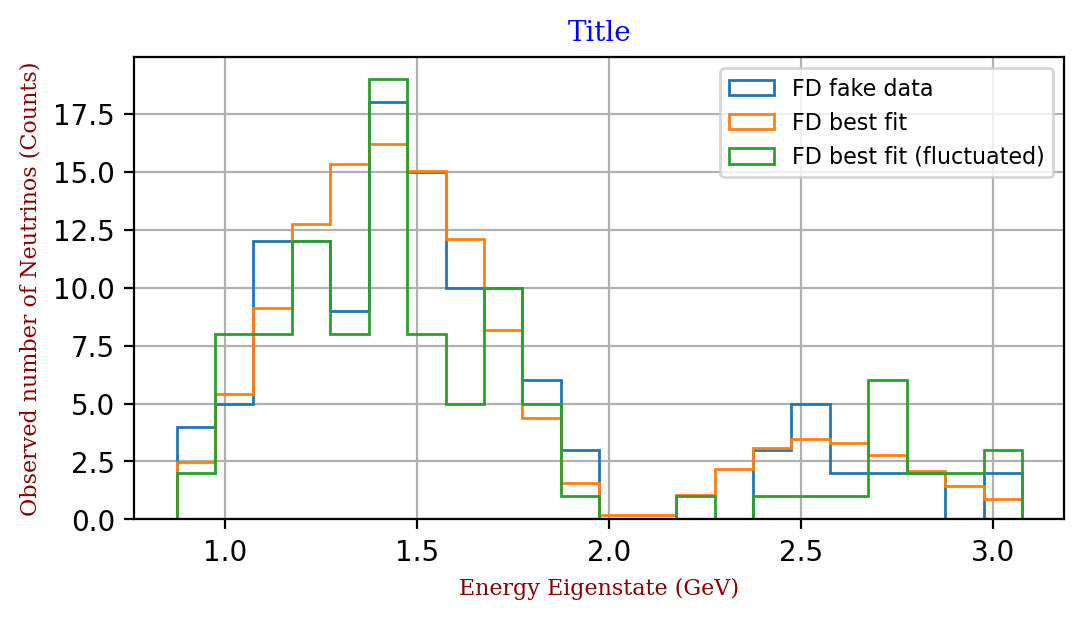

In [31]:
plt.figure(figsize=(6, 3))
plt.hist(bin_edges[:-1],bin_edges,weights=FD_counts,histtype='step',label="FD fake data")
plt.hist(bin_edges[:-1],bin_edges,weights=FD_fit,histtype='step',label="FD best fit")
plt.hist(bin_edges[:-1],bin_edges,weights=FD_fit_fluct,histtype='step',label="FD best fit (fluctuated)")
plt.legend(fontsize=8)
plt.title('Title', fontdict = font3)
plt.xlabel('Energy Eigenstate (GeV)', fontdict = font4)
plt.ylabel('Observed number of Neutrinos (Counts)', fontdict = font4)
plt.grid(True)

plt.show()

###### The fitting procedure's success was evaluated through the $\chi^{2}$ test, which quantified the agreement between model and the observed data. ######

###### The reduced $\chi^{2}$ served as a measure of the goodness of fit, which clearly showed how well the theoretical predictions align with the experimental results. ######

In [32]:
chi_2 = chi2_test(FD_counts, FD_fit)
ndof_2 = len(bin_centers) - len(parameters)
chi_2_ndof = chi_2 / ndof_2
print(chi_2_ndof)

0.7637580725724987


## Discussion ##

Part 1 of the project focuses on gaining insights into neutrino oscillation probabilities by plotting the muon neutrino survival probability as a function of distance. This initial step sets the stage for subsequent analyses and experiments, providing a fundamental understanding of neutrino behavior in simulated conditions.

The visual representation enhances the interpretability of the oscillation phenomenon, allowing for a qualitative assessment of how the survival probability evolves. I found from the extension that just as I had thought, the survival probability is a periodic graph due to it being a sine function.


Part 2 provides valuable insights into the consequences of altering oscillation parameters on the far detector spectrum. The unoscillated prediction establishes a baseline, showcasing the expected counts without any neutrino flavor transformation. This baseline, when contrasted with the oscillated predictions, illuminates the distinctive features introduced by neutrino oscillations.

Moving to the oscillated scenario, I employed specific oscillation parameters ($\sin^{2}2\theta = 1.0$ and $\Delta m^{2} = 2.4 \times 10^{-3} eV^{2}$). The visual representation enables a qualitative assessment, highlighting potential shifts in the spectrum's shape and magnitude under varying oscillation scenarios. The introduction of Poisson fluctuations acknowledges the inherent uncertainties associated with experimental observations.

The predictions of the far detector spectrum under various oscillation scenarios allowed me to explore how changes in parameters ($\sin^{2}2\theta$ and $\Delta m^{2}$) influence the expected neutrino counts. This analysis provided valuable insights into the sensitivity of the expeimental setup to different oscillation regimes.

The $\chi^{2}$ test, acting as a statistical measure, allowed me to quantify the strong correlation between the fitted Gaussian function and the actual data. The reduced $\chi^{2}$ close to 1 suggests a good fit, while deviations may indicate areas for improvement in the model or experimental setup.

The results obtained from fitting the far detector data provided the best estimates for the oscillation parameters ($\sin^{2}2\theta$ and $\Delta m^{2}$). These values represent my most accurate understanding of the underlying neutrino oscillation phenomena in the simulated experiment.

In conclusion, Part 2 serves as a crucial bridge between theoretical considerations and experimental predictions, setting the scene for a further investigation into the behavior of neutrinos under different oscillation parameters. The visualizations and simulated fluctuations enhance the interpretability of the predictions, really helping with understanding the concept more intuitively.

In the last part of this experiment, Part 3, the focus shifts to the intricate process of fitting the far detector neutrino spectrum to ascertain the optimal values for the oscillation parameters—$\sin^2(2\theta)$ and $\Delta m^2$.
The methodology employed involves utilizing the curve_fit function from the scipy.optimize module, a powerful tool for parameter estimation in scientific analyses.

The primary function being fitted is a combination of a Gaussian function and the neutrino oscillation probability. The Gaussian component characterizes the shape of the spectrum, while the oscillation probability introduces the quantum mechanical phenomenon inherent in neutrino oscillations. The goal is to determine the parameters that best describe the observed far detector counts in the context of oscillation.

The outcomes of the fitting process provide critical insights into the solid correlation between the theoretical model and experimental data. The optimized values for $\sin^2(2\theta)$ and $\Delta m^2$ encapsulate the most probable oscillation parameters that align with the observed far detector spectrum.

The close examination of the $\chi^2$ value and its ratio to the degrees of freedom aids in assessing the overall statistical validity of the fitted model. Also, I must say that the visual representation through histograms facilitates a qualitative understanding of the model's performance.


## Conclusion ##

##### Overall Assessment #####

The comprehensive exploration of neutrino oscillation parameters, from understanding the beam shape to fitting experimental data, has yielded a nuanced perspective on the simulated experiment. The results provide a foundation for further refinement of experimental setups and an understanding of the key factors influencing the observed neutrino spectra.

##### Future Directions #####

While this project successfully achieved its obectives, further investigations could explore uncertainties in the fitted parameters, examine the impact of varying experimental conditions (distance, energy, duration), and consider the implications of running the experiment for an extended period. These options for future work would enhance the robustness and applicability of the findings.

The detailed analysis and visualization of each step contribute to a comprehensive understanding of neutrino oscillation experiments, laying groundwork for more sophisticated studies in the field.